In [5]:
import torch
# import cv2
import math
# import Exception
from matplotlib import pyplot as plt

In [4]:
data_dir = "/home/as14229/Shared/SuperGAN/data/fsgan_test/"
image_dict = torch.load(data_dir+"fsgan_image_stages.pth", map_location=torch.device('cpu'))

In [6]:
image_dict.keys()

dict_keys(['src_frame', 'target_frame', 'r_bg_mask', 'reenactment', 'inpainting', 'completion', 'transfer', 'blend_final', 'result', 'gfp_cropped_face', 'gfp_restored_face', 'gfp_restored_img'])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


r_bg_mask result type Float can't be cast to the desired output type Bool
gfp_cropped_face 'list' object has no attribute 'detach'
gfp_restored_face 'list' object has no attribute 'detach'


TypeError: 'NoneType' object is not subscriptable

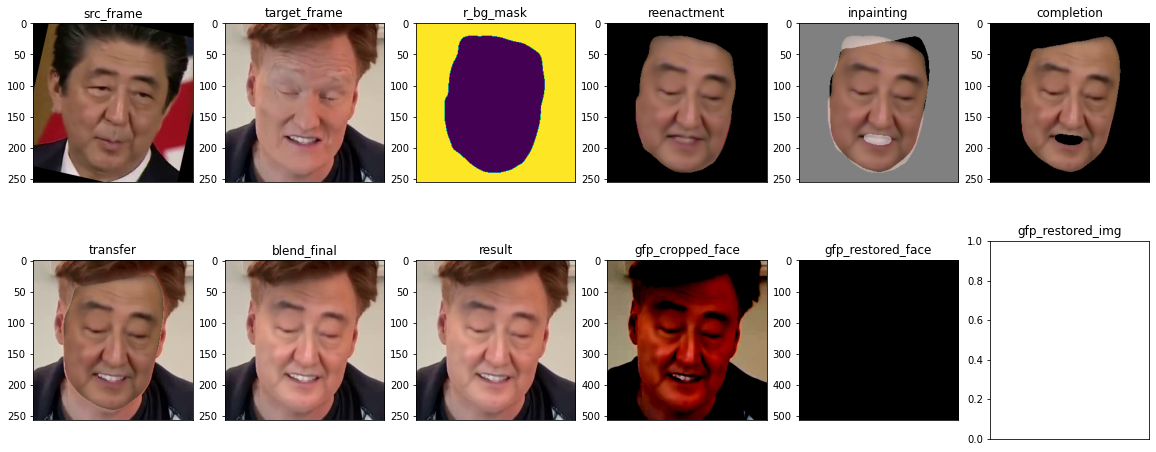

In [7]:
imlen = len(image_dict.keys())

fig, ax = plt.subplots(2,math.ceil(imlen/2), figsize=(20, 8))
ax = ax.ravel()

for i, (stage,image) in enumerate(image_dict.items()):
    ax[i].set_title(stage)
    ax[i].set_xticks([])

    try:
        image_tensor = image.detach().clone()
        image_tensor *= 0.5
        image_tensor += 0.5
        ax[i].imshow(image_tensor.permute(1, 2, 0));
    except Exception as e:
        image_tensor = image[0]
        ax[i].imshow(image_tensor)
        print(stage,e)
    
plt.show()